In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import json
from typing import Tuple
import os

matplotlib.rcParams.update(matplotlib.rcParamsDefault)

plt.style.use("ggplot")
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
FIG_SIZE = (6.4, 4)
SAVE_FIG = True
FIG_FMT = 'pdf'
TRANSPARENT_PNG=True


In [46]:
with open('../data_collection/data/snapshot_data/994_snapshot.json') as f:
    data = json.load(f)
voters = pd.DataFrame(data['voters'])
print(voters.head().to_latex())


\begin{tabular}{llrl}
\toprule
 & 0 & 1 & 2 \\
\midrule
0 & 15j4dg5GzsL1bw2U2AWgeyAk6QTxq43V7ZPbXdAmbVLjvDCK & 320000000000000000 & ['12MqEB7VLqKRgxCoGZXriPuo4GNYtaFiQ1tjMZhooPXAycM2', '12eZSMk8GJYE2Lq943dSEnMUoZs1ek7jU8QN3rEA1yPZPjcR', '16Fwe1wFveAWmUJ8WucZmu87iyp5464m9hNqvUP8oE35nwc8', '1eLUhRLQiikdt4zUrYdY4LwdwYDsStmjrqzGzC46XmuTatG', '168bhPTpsgByfKqM2pgUfZ2wPxQQpgTwxsA9iTV7vAN4wQiU', '13HtFCrxyz55KgkPWcnhHPwE8f8GmZrfXR3uC6jNrihGzmqz', '14rqNrqMwNK9YA1BSqRStNBUqGgwxKdysoL4dNQ8GH8LRcrq', '13p9kJiRnfy8QSjFoovHzatuE7SW5xdddxDvk9mXtERueo9E', '12JZr1HgK8w6zsbBj6oAEVRkvisn8j3MrkXugqtvc4E8uwLo', '13YDN239LTFZVFDuuyz8WTKHxMSCvEqiPQe1kyjABcRgxhNz', '14CRo92REj3aXfUeonVSti1VEHgxhWbtKY9hwxvD5T3BBXkK', '16hzCDgyqnm1tskDccVWqxDVXYDLgdrrpC4Guxu3gPgLe5ib', '15wffJpUgdBqtdsaRQKAEvARhrLsEDSoGzYseGUnGrtFHddN', '14SysKfnN8VzwbUCWbgZVApP27xqs5MPmrfXL2RGkePwy6Cc', '1nQBeeXXhZ3gPH95X1KcLfN5JwPCpFUXR5Sc4A5gr8nCALw', '13NdHEywqX71WyUzxEuemk9kdSE9KqEKMo1mhKH44uhTJY3e'] \\
1 & 16ZL8yLyXv3V3L3z9ofR1ovFLziyXa

In [75]:
## find how many validators have been elected who are not in the eligible targets
lazy_nominators_sets = {}
lazy_nominators_sets_length = {}
non_active_validators_sets = {}
active_validator_set_length = {}
average_bad_inclusion = {}
for era in range(600,999):

    with open(f'../data_collection/data/snapshot_data/{era}_snapshot.json') as f:
        data = json.load(f)
    voters = data['voters']
    targets = data['targets']
    lazy_nominators = set()
    non_active_validators = set()
    avg_bad_inclusion = 0
    for row in voters:
        bad_validators = 0
        for validator in row[2]:
            if validator not in targets:
                bad_validators += 1
                lazy_nominators.add(row[0])
                non_active_validators.add(validator)
        avg_bad_inclusion += bad_validators/len(row[2])
    lazy_nominators_sets[era] = lazy_nominators
    lazy_nominators_sets_length[era] = len(data['voters'])
    active_validator_set_length[era] = len(data['targets'])
    average_bad_inclusion[era] = avg_bad_inclusion/len(data['voters'])
    non_active_validators_sets[era] = non_active_validators

In [68]:
lazy_nominators_df = pd.DataFrame.from_dict(lazy_nominators_sets, orient='index')
lazy_nominators_sets_length_df = pd.DataFrame.from_dict(lazy_nominators_sets_length, orient='index')
non_active_validators_df = pd.DataFrame.from_dict(non_active_validators_sets, orient='index')
active_validator_set_length_df = pd.DataFrame.from_dict(active_validator_set_length, orient='index')
lazy_nominators_sets_length_df.columns = ['count']
active_validator_set_length_df.columns = ['count']

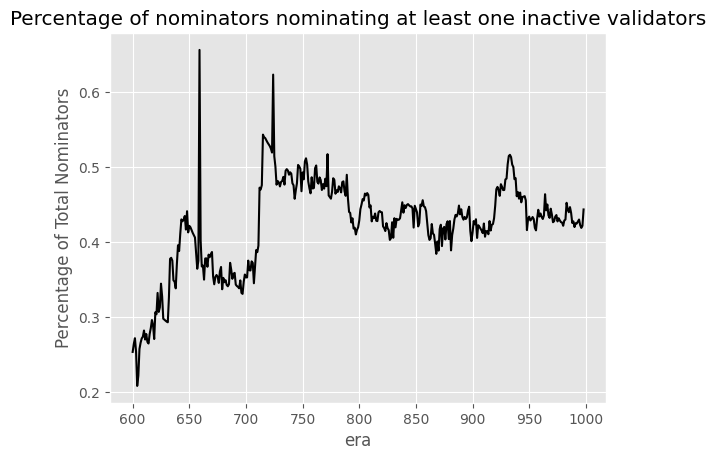

In [103]:
fig = plt.plot(lazy_nominators_df.index, lazy_nominators_df.count(axis=1)/lazy_nominators_sets_length_df['count'], color='black')
plt.xlabel('era')
plt.ylabel('Percentage of Total Nominators')
plt.title('Percentage of nominators nominating at least one inactive validators')
plt.savefig("./images/percentage_of_nominators_nominating_inactive_validators.png", bbox_inches='tight', dpi=300)
plt.show()

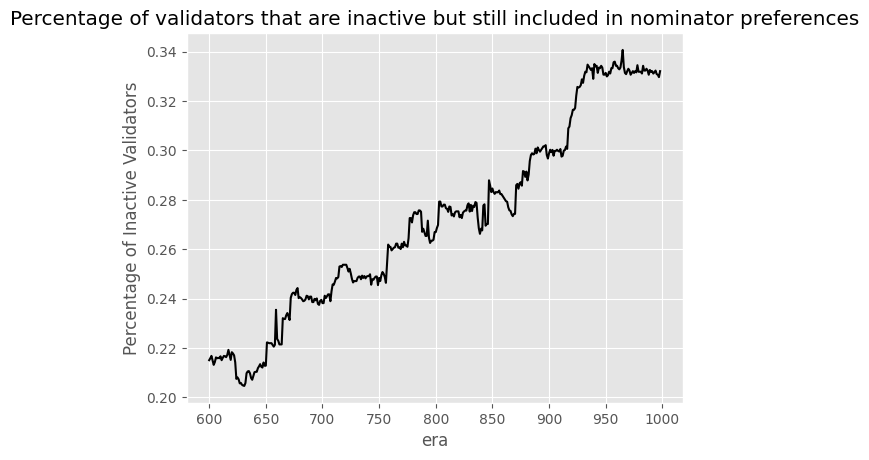

In [74]:
fig = plt.plot(lazy_nominators_df.index, non_active_validators_df.count(axis=1)/(non_active_validators_df.count(axis=1) + active_validator_set_length_df['count']), color='black')
plt.xlabel('era')
plt.ylabel('Percentage of Inactive Validators')
plt.title('Percentage of validators that are inactive but still included in nominator preferences')
plt.savefig("./images/percentage_of_inactive_validators_included_in_nominator_preferences.png", bbox_inches='tight', dpi=300)
plt.show()

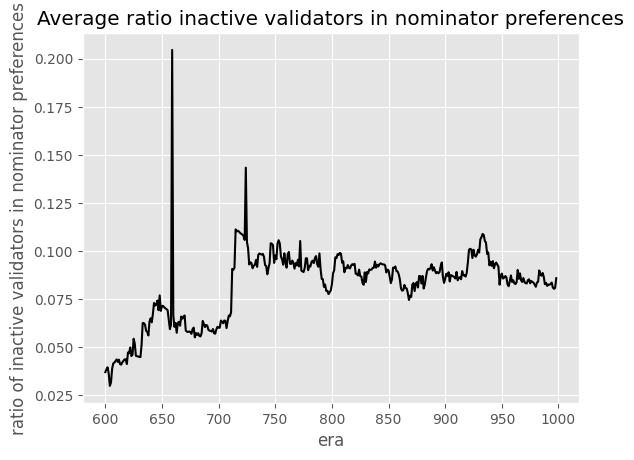

In [105]:
fig = plt.plot(lazy_nominators_df.index, average_bad_inclusion.values(), color='black')
plt.xlabel('era')
plt.ylabel('ratio of inactive validators in nominator preferences')
plt.title('Average ratio inactive validators in nominator preferences')
plt.savefig("./images/average_ratio_of_inactive_validators_included_in_nominator_preferences.png", bbox_inches='tight', dpi=300)
plt.show()

In [111]:
average_bad_inclusion

{600: 0.03691523643023685,
 601: 0.038402893711227466,
 602: 0.03942467359800738,
 603: 0.03622406433073131,
 604: 0.029736613571613713,
 605: 0.03156167505334197,
 606: 0.03865377727211095,
 607: 0.04142617234617267,
 608: 0.0419022577422581,
 609: 0.042694990441657484,
 610: 0.043515897682564766,
 611: 0.04226796746463449,
 612: 0.0433903386736724,
 613: 0.04110927424427461,
 614: 0.040821425673092694,
 615: 0.04203147309480691,
 616: 0.04275455476622194,
 617: 0.043553676077009995,
 618: 0.04357914813581538,
 619: 0.04114557498057547,
 620: 0.04712811663645065,
 621: 0.04679032936199669,
 622: 0.04972933720600449,
 623: 0.045292894821228794,
 624: 0.04594104925938325,
 625: 0.05426305848472545,
 626: 0.051672354867355164,
 627: 0.04538372615039332,
 628: 0.04520878917378967,
 629: 0.045010198505199,
 630: 0.04486803301636684,
 631: 0.04474619651953034,
 632: 0.05117266306585648,
 633: 0.062490027091916846,
 634: 0.0624318129460113,
 635: 0.061641566470667784,
 636: 0.058478512273851

In [112]:
era_660 = non_active_validators_df.loc[non_active_validators_df['index'] == 660]
era_660_set = set()
for col in era_660:
    validator = era_660[col].unique()
    if validator is not None:
        era_660_set.add(validator[0])

era_659 = non_active_validators_df.loc[non_active_validators_df['index'] == 659]
era_659_set = set()
for col in era_659:
    validator = era_659[col].unique()
    if validator is not None:
        era_659_set.add(validator[0])

diff = era_660_set.difference(era_659_set)
diff
#https://polkadot.subscan.io/block/9556763

{'11AnciffJctDC28odTEjDVYP2yWyp6275WLbrAUHi2vJm9f', 660}

In [6]:
lazy_nominators_df['count'] = lazy_nominators_df.count(axis=1)
#get era where count is max
lazy_nominators_df.loc[lazy_nominators_df['count'].idxmax()]

0        1247sZdGJCMYSaSkaBzFCGkSLiQDZK9cs4n4p4fovYxAJidn
1        12zAiJrwccHjcaznSNeecNMGMR5eMpwFeSaMUeH2ruq4pPtw
2        12gieLZDCjxCqwTfnQtXD46yr9cvAgaRVhf5fvt4gYUpdXwi
3        16amNrNCPou26UBWR6HiksZVqnTqX8zhgnaG3LjTYbYxghnC
4        12QnR5Cq8hLtbmhsTPyJhsT8iWJEX5DGqS1ic53PGYTdB5vQ
                               ...                       
14769     1rhS8qnSpgqcjcCAHNCJ3Lakk1PvDnxUYf3hYedm447jKp9
14770     1JkRDd8a59awaKrSkgU6DH9QwJk5YTdMHNcd25wKCTrX94P
14771    15ME8CghoimVLdm2eACBDe3zt6PqGsr69Z2pFaZY88NEERjd
14772     1HK8XC1JweU2W3v9N27GqtBFpTnfdLo25oK1yGVgJmCkHrh
count                                               14773
Name: 659, Length: 14774, dtype: object

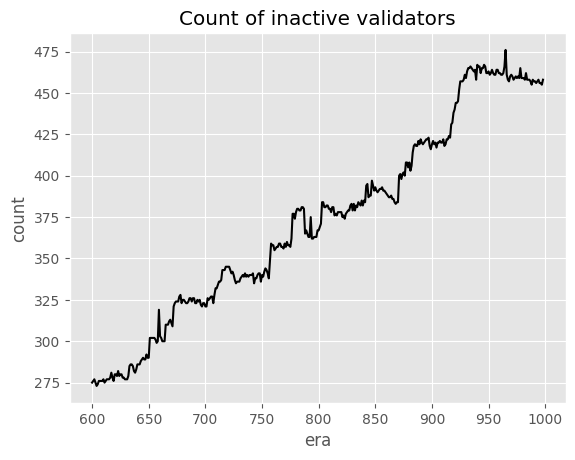

In [72]:
plt.plot(non_active_validators_df.index, non_active_validators_df.count(axis=1), color='black')
plt.xlabel('era')
plt.ylabel('count')
plt.title('Count of inactive validators')
plt.savefig("./images/count_of_inactive_validators.png", bbox_inches='tight', dpi=300)
plt.show()

In [8]:
df = pd.read_csv('../data_collection/data/processed_data/model_1_data_994.csv')
dataframes = []
for era in range(600, 965):
    dataframes.append(pd.read_csv(f'../data_collection/data/processed_data/model_1_data_{era}.csv'))
dfs = pd.concat(dataframes)

In [9]:
df.memory_usage().sum()

42016

In [10]:
df.describe()


,overall_total_bond,overall_proportional_bond,nominator_count,elected_current_era,elected_previous_era,era
count,7.480000e+02,7.480000e+02,748.000000,748.000000,748.000000,748.0
mean,8.362243e+16,7.578826e+15,280.792781,0.397059,0.397059,994.0
std,1.028387e+17,8.404817e+15,495.562408,0.489616,0.489616,0.0
min,3.300000e+12,2.450622e+11,1.000000,0.000000,0.000000,994.0
25%,1.245603e+15,9.952872e+13,5.000000,0.000000,0.000000,994.0
50%,2.414673e+16,2.218808e+15,35.000000,0.000000,0.000000,994.0
75%,1.561119e+17,1.555398e+16,338.250000,1.000000,1.000000,994.0
max,4.705575e+17,4.404996e+16,3954.000000,1.000000,1.000000,994.0


In [11]:
df.head()

,validator,overall_total_bond,overall_proportional_bond,nominator_count,elected_current_era,elected_previous_era,era
0,111B8CxcmnWbuDLyGvgUmRezDCK1brRZmvUuQ6SrFdMyc3S,20823552826875551,1.008494e+16,200,1,1,994
1,1123RekaPHgWaPL5v9qfsikRemeZdYC4tvKXYuLXwhfT3NKy,7375432213048161,7.536657e+14,367,0,0,994
2,1124RsfEgJEZvEq4HbtGFcpqoxnqSy79EjNZY9tzPct3AB6o,1144044728005697,1.558923e+14,77,0,0,994
3,112HGqrHtL8go7naesBTkmGS5yMyUPutNSrFkbZ7mZkza6Qc,18033825813485,1.144904e+12,3,0,0,994
4,114SUbKCXjmb9czpWTtS3JANSmNRwVa4mmsMrWYpRG1kDH5,280767915865848935,1.917250e+16,220,1,1,994


In [12]:
df.shape

(748, 7)

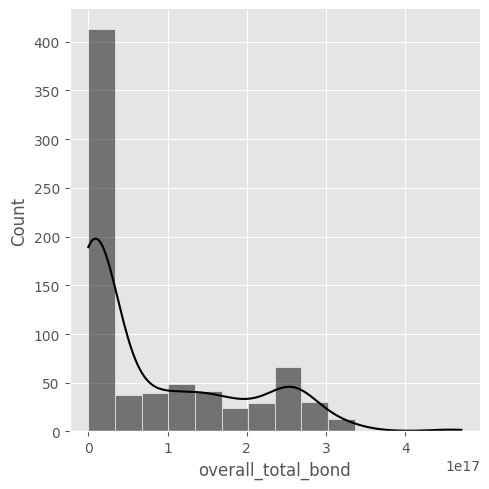

In [29]:
sns.displot(df, x='overall_total_bond', kde=True, color='black')
plt.savefig("./images/overall_total_bond.png", bbox_inches='tight', dpi=300)

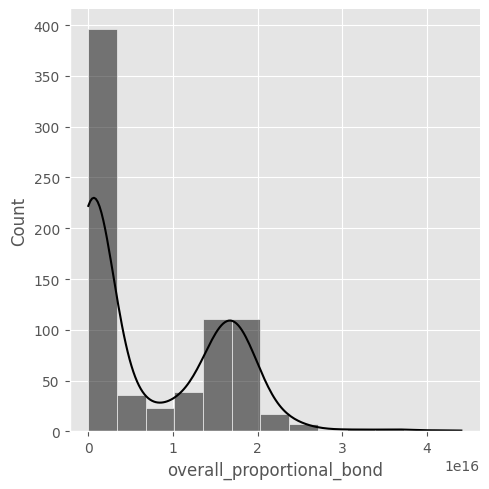

In [31]:
sns.displot(df, x='overall_proportional_bond', kde=True, color='black')
plt.savefig("./images/overall_proportional_bond.png", bbox_inches='tight', dpi=300)

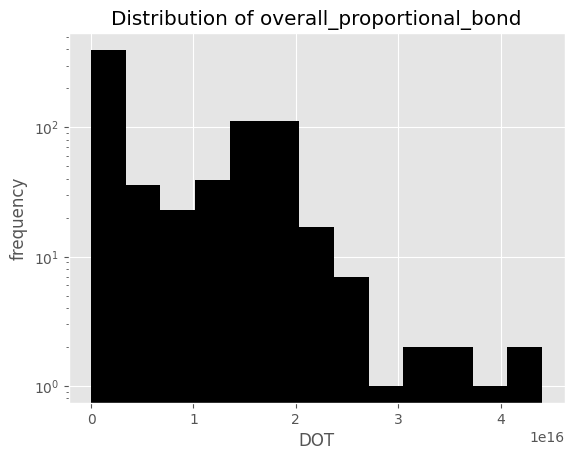

In [32]:
bins = np.histogram_bin_edges(df.groupby("validator")['overall_proportional_bond'].first(), bins="auto")
plt.hist(df['overall_proportional_bond'], bins=bins, alpha=1, color='black')
plt.yscale('log')
plt.title("Distribution of overall_proportional_bond")
plt.xlabel("DOT")
plt.ylabel("frequency")
plt.savefig("./images/overall_proportional_bond_hist.png", bbox_inches='tight', dpi=300)
plt.show()

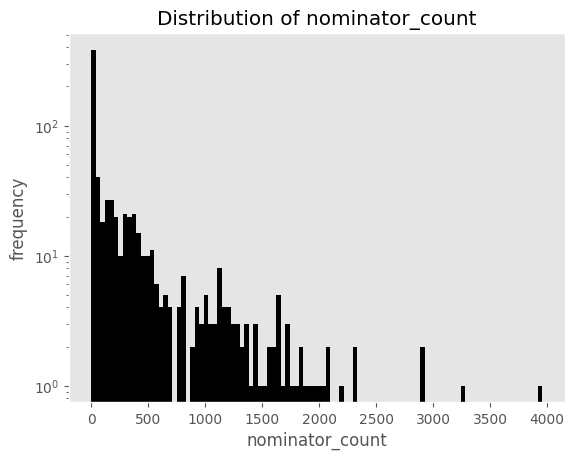

In [33]:
df['nominator_count'].plot.hist(bins=100, alpha=1, color='black')
plt.grid()
plt.yscale('log')
plt.title("Distribution of nominator_count")
plt.xlabel("nominator_count")
plt.ylabel("frequency")
plt.savefig("./images/nominator_count_hist.png", bbox_inches='tight', dpi=300)
#sns.displot(df, x='nominator_count', kde=True)

In [17]:
df['elected_current_era'].value_counts()

elected_current_era
0    451
1    297
Name: count, dtype: int64

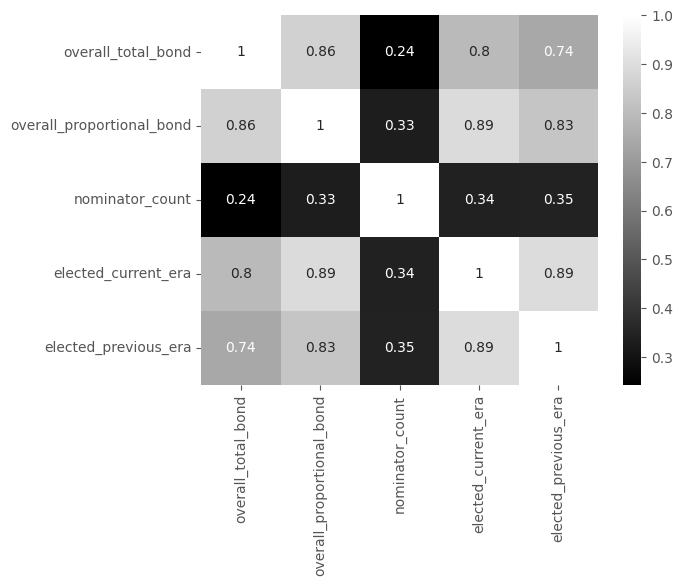

In [37]:
# correlation matrix with sns
df_corr = df.copy()
df_corr.drop(["validator", "era"], axis=1, inplace=True)
corr = df_corr.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap="gray")
plt.savefig("./images/correlation_matrix_m1.png", bbox_inches="tight", dpi=300)
plt.show()

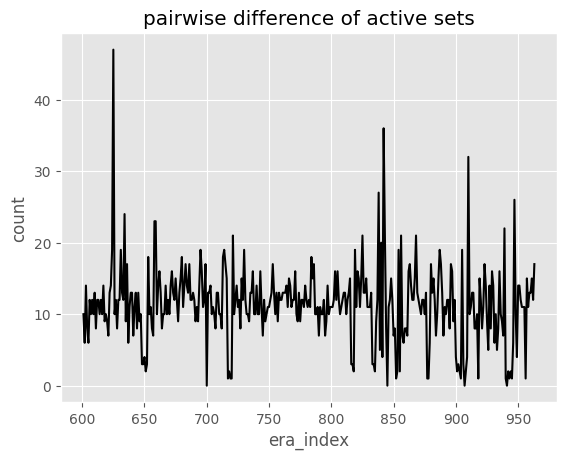

In [38]:
era_index = []
set_difference = []
for i in range(600,965):
    df1 = set(dfs[(dfs['era'] == i) & (dfs['elected_current_era'] == 1)]['validator'])
    df2 = set(dfs[(dfs['era'] == i+1) & (dfs['elected_current_era'] == 1)]['validator'])
    era_index.append(i)
    set_difference.append(len(df1.difference(df2)))
plt.title("pairwise difference of active sets")
plt.xlabel("era_index")
plt.ylabel("count")
plt.plot(era_index[1:-1], set_difference[1:-1], color='black')
plt.savefig("./images/pairwise_difference_of_active_sets.png", bbox_inches='tight', dpi=300)

In [20]:
# set the elected counter equal at all validators of same address.
validators = set(dfs.validator.unique())
count_adapted_df = dfs.copy()
for validator in validators:
    count_adapted_df.loc[count_adapted_df['validator'] == validator, 'elected_counter'] = len(count_adapted_df.loc[(count_adapted_df['validator'] == validator) & (count_adapted_df['elected_current_era'] == 1)])
count_adapted_df.head()

,validator,overall_total_bond,overall_proportional_bond,nominator_count,elected_current_era,elected_previous_era,era,elected_counter
0,111B8CxcmnWbuDLyGvgUmRezDCK1brRZmvUuQ6SrFdMyc3S,20512588154036345,3.011515e+15,140,1,1,600,362.0
1,1124RsfEgJEZvEq4HbtGFcpqoxnqSy79EjNZY9tzPct3AB6o,91933819578259145,5.797898e+15,403,1,1,600,254.0
2,112A6wJPeDsf34nsqoAkAtQ8n74vJU8qmyKMtzX7ZPQH2kXa,238491180689120645,1.492956e+16,121,1,1,600,26.0
3,114SUbKCXjmb9czpWTtS3JANSmNRwVa4mmsMrWYpRG1kDH5,201807329737795854,2.075172e+16,350,1,1,600,365.0
4,1155dDdp1X4F3rh35hAMoK8r4iDVdzprtRpVrScP35YPC2b,1232865053357,1.119054e+11,2,0,0,600,0.0


In [21]:
validator_frequency = count_adapted_df.groupby("validator")['elected_counter'].first().reset_index()

In [22]:

grouped_df['elected_counter'] = grouped_df['elected_counter'].div(grouped_df['elected_counter'].sum())
#plt.hist(grouped_df['index'], 200, histtype="stepfilled", alpha=.7, cumulative=-1)
cumsum = np.cumsum(grouped_df['elected_counter'])
plt.plot(grouped_df['index'], cumsum, )
plt.xlabel('fraction of era elected')
plt.ylabel('fraction of validators')
plt.title('Cumulative elected validator distribution')

NameError: name 'grouped_df' is not defined

In [47]:
value_counts_elected = validator_frequency['elected_counter'].value_counts().reset_index().sort_values(by="elected_counter", ascending=False)

In [48]:
value_counts_elected['fraction_of_validators'] = value_counts_elected['count'].div(value_counts_elected['count'].sum())
value_counts_elected['fraction_of_eras'] = value_counts_elected['elected_counter'].div(value_counts_elected['elected_counter'].max())
value_counts_elected['fraction_of_validators_cumsum'] = np.cumsum(value_counts_elected['fraction_of_validators'])

In [49]:
value_counts_elected

,elected_counter,count,fraction_of_validators,fraction_of_eras,fraction_of_validators_cumsum
1,365.0,122,0.091867,1.000000,0.091867
5,364.0,11,0.008283,0.997260,0.100151
53,363.0,4,0.003012,0.994521,0.103163
11,362.0,8,0.006024,0.991781,0.109187
105,361.0,2,0.001506,0.989041,0.110693
...,...,...,...,...,...
2,4.0,33,0.024849,0.010959,0.518825
10,3.0,9,0.006777,0.008219,0.525602
65,2.0,3,0.002259,0.005479,0.527861
4,1.0,13,0.009789,0.002740,0.537651


In [ ]:
plt.plot(value_counts_elected['fraction_of_eras'], value_counts_elected['fraction_of_validators_cumsum'], color='black')
plt.xlabel('fraction of era elected')
plt.ylabel('fraction of validators')
plt.title('Cumulative elected validator distribution')
plt.savefig("./images/cumulative_elected_validator_distribution.png", bbox_inches='tight', dpi=300)
#change height of plot
plt.tight_layout()
plt.show()

In [52]:
loser_df = count_adapted_df.copy()
loser_df = loser_df.loc[(loser_df['elected_counter'] == 0) & (loser_df['elected_current_era'] == 0)]
describe_loser_df = loser_df.describe()
describe_loser_df.reset_index(inplace=True)
describe_loser_df = describe_loser_df[describe_loser_df['index'] != 'count']
loser_df.loc[loser_df["nominator_count"] == loser_df['nominator_count'].max()]

,validator,overall_total_bond,overall_proportional_bond,nominator_count,elected_current_era,elected_previous_era,era,elected_counter
863,1hJdgnAPSjfuHZFHzcorPnFvekSHihK9jdNPWHXgeuL7zaJ,41922656018993102,3.654151e+15,944,0,0,600,0.0


In [53]:
winner_df = count_adapted_df.copy()
winner_df = winner_df.loc[winner_df['elected_counter'] == 365]
describe_winner_df = winner_df.describe()
describe_winner_df.reset_index(inplace=True)
describe_winner_df = describe_winner_df[describe_winner_df['index'] != 'count']

In [54]:
concated_dfs = []
for index, column in enumerate(describe_winner_df.columns):
    concated_dfs.append(pd.concat([describe_winner_df[column], describe_loser_df[column]], axis=1))
    concated_dfs[index].columns = ["winner", "loser"]

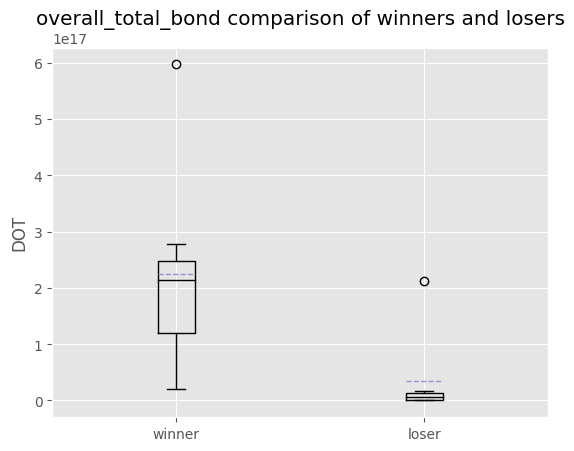

In [56]:
concated_dfs[1].boxplot(meanline=True, showmeans=True, color='black')
plt.title("overall_total_bond comparison of winners and losers")
plt.ylabel("DOT")
plt.savefig("./images/overall_total_bond_comparison_of_winners_and_losers.png", bbox_inches='tight', dpi=300)
plt.show()

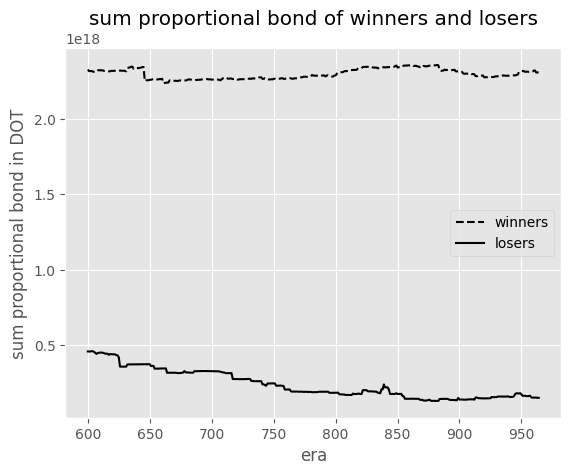

In [60]:
proportional_bonds_winners = winner_df.groupby("era").sum('overall_proportional_bond').reset_index()
proportional_bonds_losers = loser_df.groupby("era").sum('overall_proportional_bond').reset_index()
plt.plot(proportional_bonds_winners['era'], proportional_bonds_winners['overall_proportional_bond'], color='black', linestyle='--')
plt.plot(proportional_bonds_losers['era'], proportional_bonds_losers['overall_proportional_bond'], color='black', linestyle='-')
plt.xlabel("era")
plt.ylabel("sum proportional bond in DOT")
plt.legend(["winners", "losers"])
plt.title("sum proportional bond of winners and losers")
plt.savefig("./images/sum_proportional_bond_of_winners_and_losers.png", bbox_inches='tight', dpi=300)
plt.show()

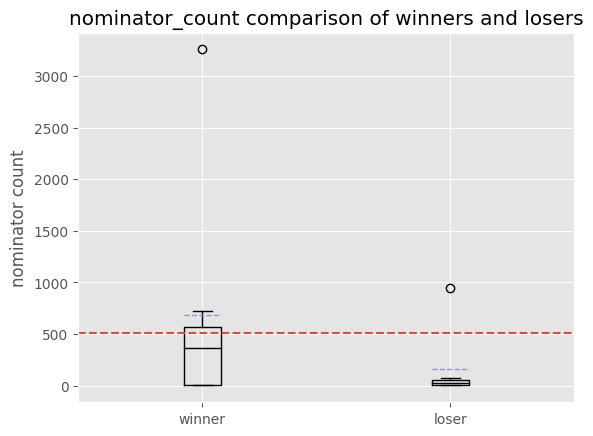

In [63]:
# oversubscribed after 512
concated_dfs[3].boxplot(meanline=True, showmeans=True, color='black')
plt.axhline(512, linestyle='--')
plt.title("nominator_count comparison of winners and losers")
plt.ylabel("nominator count")
plt.savefig("./images/nominator_count.png", bbox_inches='tight', dpi=300)
plt.show()

# predictions

In [1]:


import pickle

import optuna
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import (
    GradientBoostingRegressor,
    GradientBoostingClassifier,
)
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import learning_curve, validation_curve
from lightgbm.sklearn import LGBMRegressor, LGBMClassifier
import lightgbm as lgb
from lightgbm import plot_importance, plot_tree
import pandas as pd
from src.score import ScoringTool
from src.adjustment import AdjustmentTool
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error, accuracy_score
from xgboost import XGBRegressor, XGBClassifier
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import graphviz

In [2]:
score = []
feature_importance = []
counter = 0
for test_era in range(1003,1033):
    counter += 1
    dataframes = []
    for era in range(test_era - 3, test_era + 1):
        dataframes.append(pd.read_csv(f"../data_collection/data/processed_data/model_1_data_{era}.csv"))
    dataframe = pd.concat(dataframes)
    features = [
        "overall_total_bond",
        "overall_proportional_bond",
        "nominator_count",
        "elected_previous_era",
        "era"
      ]
    target = "elected_current_era"
    X = dataframe.loc[:, features]
    y = dataframe.loc[:, target]
    drop_columns = X.select_dtypes(include=["object"]).columns
    X_train = X[X["era"] != test_era].drop(drop_columns, axis=1)
    X_train = X_train.drop(["era"], axis=1)
    X_test = X[X["era"] == test_era].drop(drop_columns, axis=1)
    X_test = X_test.drop(["era"], axis=1)
    y_train = y[X["era"] != test_era]
    y_test = y[X["era"] == test_era]

    transform_columns = X_train.select_dtypes(exclude=["object"]).columns
    column_transformer = make_column_transformer(
        (
            MinMaxScaler(),
            transform_columns,
        ),
        remainder="passthrough",
    )
    X_train = column_transformer.fit_transform(X_train)
    X_test = column_transformer.transform(X_test)

    model = LGBMClassifier(
                random_state=42,
                cat_smooth=69,
                colsample_bytree=0.7,
                learning_rate=0.44760623102279595,
                max_depth=3,
                min_child_samples=87,
                n_estimators=556,
                num_leaves=65,
                reg_alpha=0.10909587064492554,
                reg_lambda=0.6884682800432496,
                subsample=0.6
            )

    model.fit(X_train, y_train, eval_set=[(X_test, y_test)],
                           callbacks=[lgb.early_stopping(stopping_rounds=100, verbose=False)]
                           )

    feature_importance.append(model.feature_importances_)
    score.append(model.score(X_test, y_test))

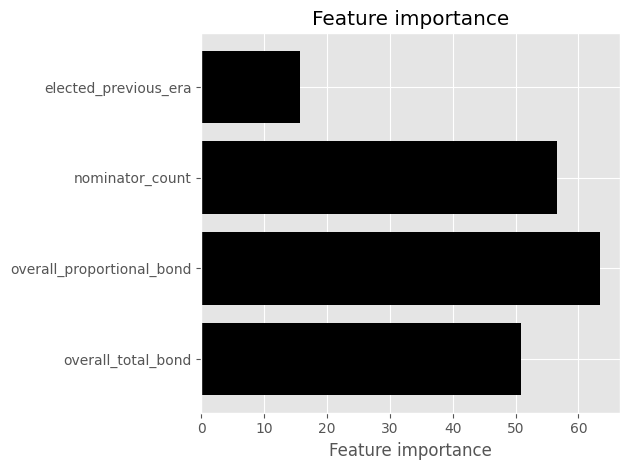

In [6]:
plt.barh(features[:4], np.mean(feature_importance, axis=0), color='black')
plt.title("Feature importance")
plt.xlabel("Feature importance")
plt.tight_layout()
plt.savefig("./images/feature_importance_m1.png", bbox_inches='tight', dpi=300)

In [53]:
score_baseline = []
feature_importance_baseline = []
counter = 0
for test_era in range(1003,1033):
    counter += 1
    dataframes = []
    for era in range(test_era - 3, test_era + 1):
        dataframes.append(pd.read_csv(f"../data_collection/data/processed_data/model_1_data_{era}.csv"))
    dataframe = pd.concat(dataframes)
    features = [
        "elected_previous_era",
        "era"
      ]
    target = "elected_current_era"
    X = dataframe.loc[:, features]
    y = dataframe.loc[:, target]
    drop_columns = X.select_dtypes(include=["object"]).columns
    X_train = X[X["era"] != test_era].drop(drop_columns, axis=1)
    X_train = X_train.drop(["era"], axis=1)
    X_test = X[X["era"] == test_era].drop(drop_columns, axis=1)
    X_test = X_test.drop(["era"], axis=1)
    y_train = y[X["era"] != test_era]
    y_test = y[X["era"] == test_era]

    transform_columns = X_train.select_dtypes(exclude=["object"]).columns
    column_transformer = make_column_transformer(
        (
            MinMaxScaler(),
            transform_columns,
        ),
        remainder="passthrough",
    )
    X_train = column_transformer.fit_transform(X_train)
    X_test = column_transformer.transform(X_test)

    model = LGBMClassifier(
                random_state=42,
                cat_smooth=69,
                colsample_bytree=0.7,
                learning_rate=0.44760623102279595,
                max_depth=3,
                min_child_samples=87,
                n_estimators=556,
                num_leaves=65,
                reg_alpha=0.10909587064492554,
                reg_lambda=0.6884682800432496,
                subsample=0.6
            )

    model.fit(X_train, y_train, eval_set=[(X_test, y_test)],
                           callbacks=[lgb.early_stopping(stopping_rounds=100, verbose=False)]
                           )

    feature_importance_baseline.append(model.feature_importances_)
    score_baseline.append(model.score(X_test, y_test))

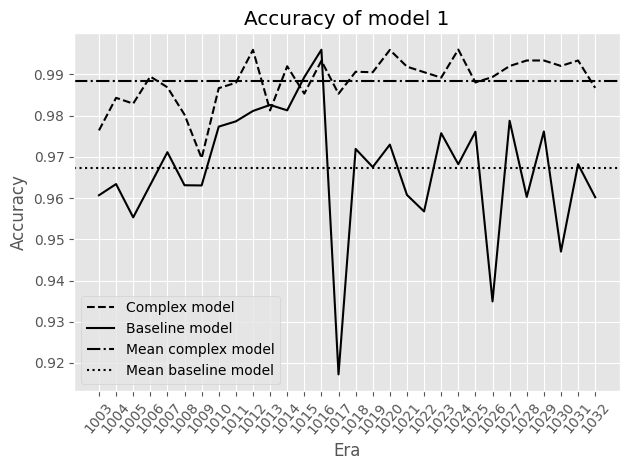

In [54]:
plt.plot(score, color='black', ls='--')
plt.plot(score_baseline, color='black', ls='-')
plt.xticks(range(30), range(1003,1033), rotation=50)
plt.axhline(np.mean(score), c='black', ls='-.')
plt.axhline(np.mean(score_baseline), c='black', ls=':')
plt.legend(["Complex model", "Baseline model", "Mean complex model", "Mean baseline model"])
plt.xlabel("Era")
plt.ylabel("Accuracy")
plt.title("Accuracy of model 1")
plt.tight_layout()
plt.savefig("./images/accuracy_m1_complex.png", bbox_inches='tight', dpi=300)



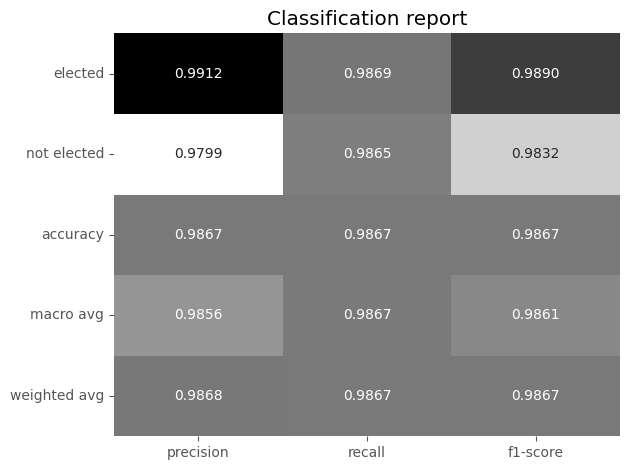

In [10]:
clf_report = classification_report(y_test, model.predict(X_test), target_names=['elected', 'not elected'], output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap="Greys", cbar=False, fmt=".4f")
plt.title("Classification report")
plt.tight_layout()
plt.savefig("./images/classification_report_m1.png", bbox_inches='tight', dpi=300)


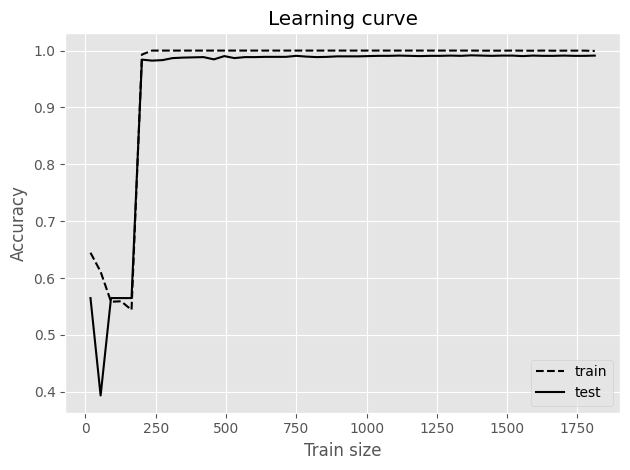

In [62]:
# plot learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50)
)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="train", ls='--', c='black')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="test", ls='-', c='black')
plt.legend()
plt.xlabel("Train size")
plt.ylabel("Accuracy")
plt.title("Learning curve")
plt.tight_layout()
plt.savefig("./images/learning_curve_m1.png", bbox_inches='tight', dpi=300)
plt.show()

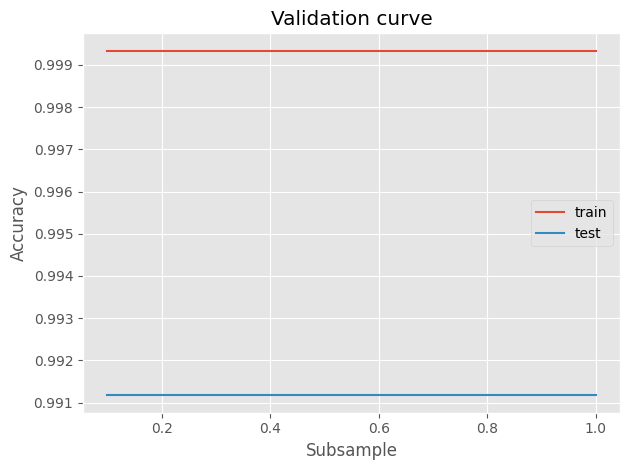

In [60]:
# plot validation curve
param_range = np.linspace(0.1, 1.0, 10)
train_scores, test_scores = validation_curve(
    model,
    X_train,
    y_train,
    param_name="subsample",
    param_range=param_range,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)
plt.plot(param_range, np.mean(train_scores, axis=1), label="train")
plt.plot(param_range, np.mean(test_scores, axis=1), label="test")
plt.legend()
plt.xlabel("Subsample")
plt.ylabel("Accuracy")
plt.title("Validation curve")
plt.tight_layout()
plt.show()